In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [39]:
def load_dataset():
    # Load the dataset using pandas read_csv() function
    boston_data = pd.read_csv('boston.csv')  # 'boston.csv' is file path
    
    # Return the DataFrame
    return boston_data

# Load the dataset into a DataFrame
boston_dataframe = load_dataset()

# Print the first few rows of the DataFrame
print(boston_dataframe.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [40]:
# Print the first 10 rows of the DataFrame
print(boston_dataframe.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396

In [41]:

def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("\nFirst 10 rows of dataset:")
    print(dataset.head(10))
    print("\nStatistical summary:")
    print(dataset.describe())

print_summarize_dataset(boston_dataframe)


Dataset dimension:
(506, 14)

First 10 rows of dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  

In [42]:

def clean_dataset(boston_dataframe):
    # Drop rows with missing values
    cleaned_dataframe = boston_dataframe.dropna()

    # Return the cleaned DataFrame
    return cleaned_dataframe

# Load the dataset into a DataFrame
boston_dataframe = load_dataset()

# Clean the dataset
cleaned_dataframe = clean_dataset(boston_dataframe)

# Verify the result
print(cleaned_dataframe.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MDEV       0
dtype: int64


# Looking for correlations

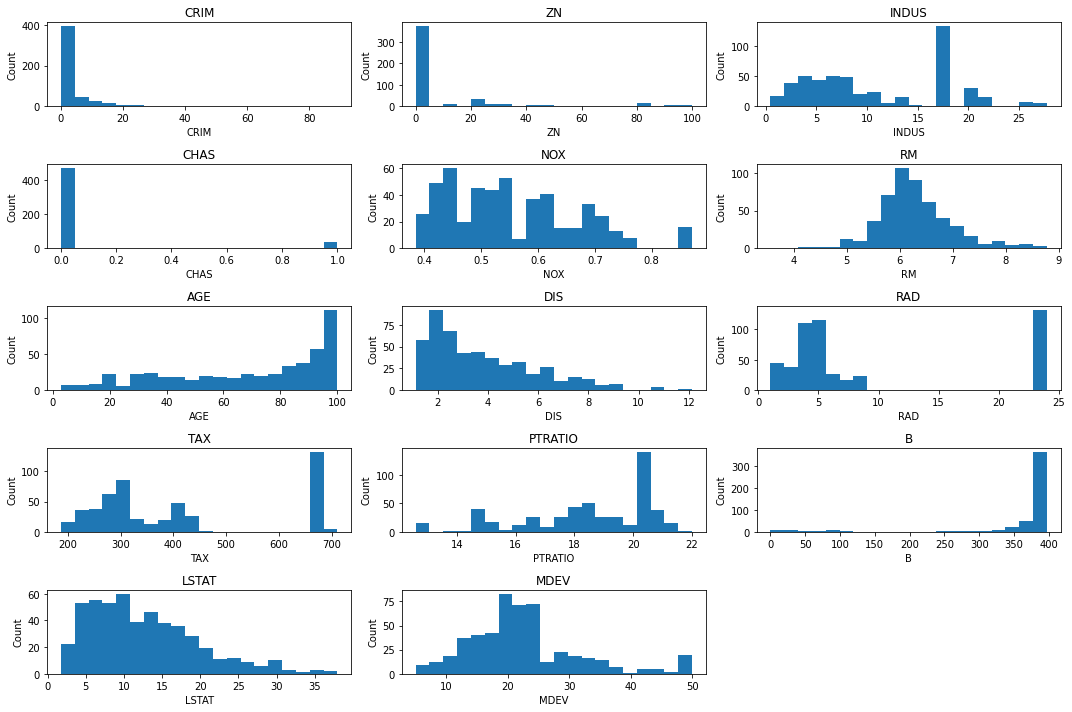

In [43]:
def print_histograms(dataset):
    # Get the numerical columns
    numerical_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']

    # Create subplots
    fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 10))
    axs = axs.flatten()

    # Plot histograms for numerical columns
    for i, col in enumerate(numerical_cols):
        axs[i].hist(dataset[col], bins=20)
        axs[i].set_title(col)
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Count')

    # Hide the last subplot
    axs[-1].axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

print_histograms(cleaned_dataframe)




In [44]:

def compute_correlations_matrix(boston_dataframe):
    correlations = boston_dataframe.corr(method='pearson')
    return correlations

correlations = compute_correlations_matrix(boston_dataframe)

print(correlations['MDEV'])


CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MDEV       1.000000
Name: MDEV, dtype: float64


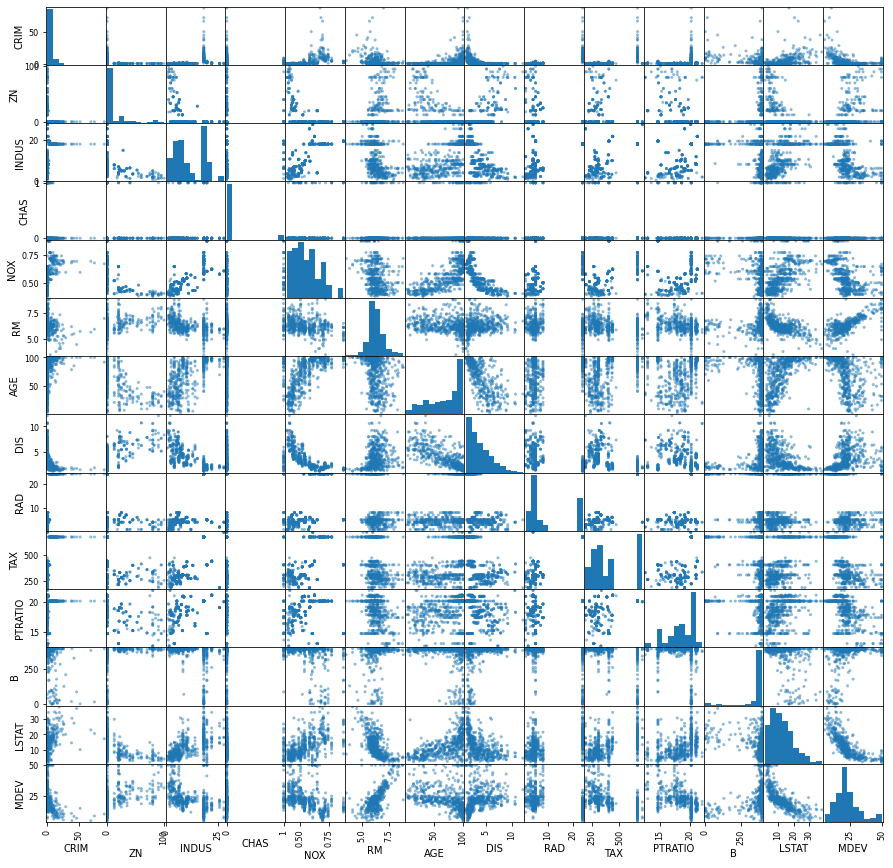

In [45]:
def print_scatter_matrix(boston_dataframe):
    pd.plotting.scatter_matrix(boston_dataframe, figsize=(15, 15))
    plt.show()

# Load the dataset into a DataFrame
boston_dataframe = load_dataset()

# Print scatter matrix
print_scatter_matrix(boston_dataframe)


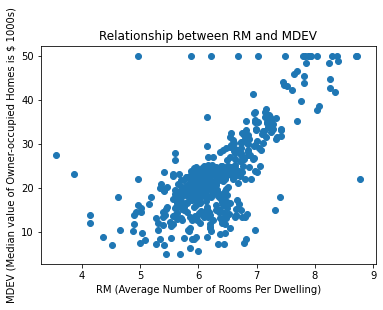

In [46]:
# Plot MEDV as a function of RM
plt.scatter(boston_dataframe['RM'], boston_dataframe['MDEV'])
plt.xlabel('RM (Average Number of Rooms Per Dwelling)')
plt.ylabel('MDEV (Median value of Owner-occupied Homes is $ 1000s)')
plt.title('Relationship between RM and MDEV')
plt.show()


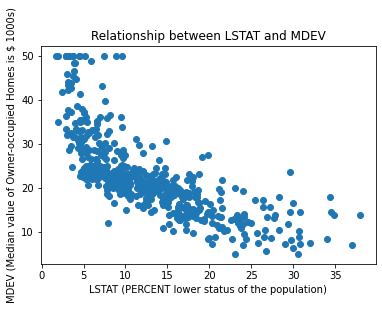

In [47]:
# Plot MEDV as a function of LSTAT
plt.scatter(boston_dataframe['LSTAT'], boston_dataframe['MDEV'])
plt.xlabel('LSTAT (PERCENT lower status of the population)')
plt.ylabel('MDEV (Median value of Owner-occupied Homes is $ 1000s)')
plt.title('Relationship between LSTAT and MDEV')
plt.show()
  

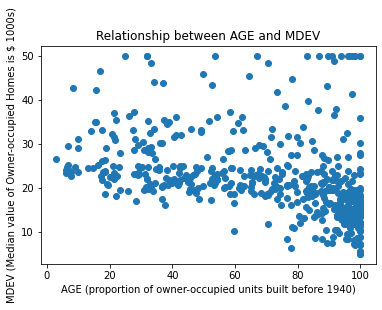

In [48]:
# Plot MEDV as a function of AGE
plt.scatter(boston_dataframe['AGE'], boston_dataframe['MDEV'])
plt.xlabel('AGE (proportion of owner-occupied units built before 1940)')
plt.ylabel('MDEV (Median value of Owner-occupied Homes is $ 1000s)')
plt.title('Relationship between AGE and MDEV')
plt.show()


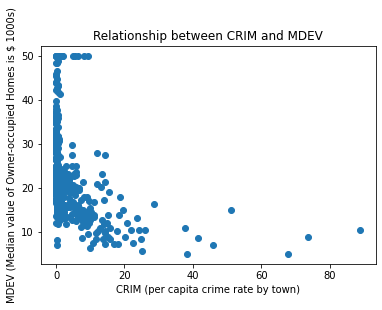

In [49]:
# Plot MEDV as a function of CRIM
plt.scatter(boston_dataframe['CRIM'], boston_dataframe['MDEV'])
plt.xlabel('CRIM (per capita crime rate by town)')
plt.ylabel('MDEV (Median value of Owner-occupied Homes is $ 1000s)')
plt.title('Relationship between CRIM and MDEV')
plt.show()


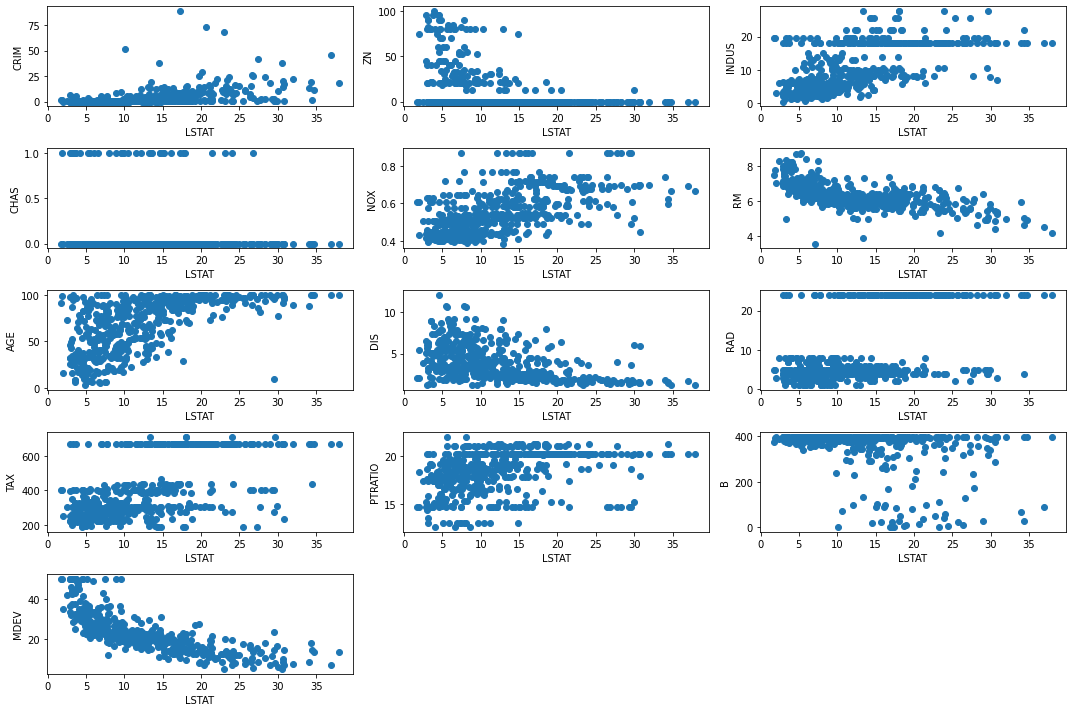

In [50]:


def plot_lstat_vs_other_attributes(boston_dataframe):
    attributes = boston_dataframe.columns.tolist()  # To get all attribute names
    attributes.remove('LSTAT')  # Remove 'LSTAT' from the list

    fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 10))
    axs = axs.flatten()

    for i, attribute in enumerate(attributes):
        axs[i].scatter(boston_dataframe['LSTAT'], boston_dataframe[attribute])
        axs[i].set_xlabel('LSTAT')
        axs[i].set_ylabel(attribute)

    # Hide unused subplots
    for j in range(len(attributes), len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

# Load the dataset into a DataFrame
boston_dataframe = load_dataset()

# Plot 'LSTAT' against other attributes
plot_lstat_vs_other_attributes(boston_dataframe)



In [51]:
def compute_correlations_matrix(boston_dataframe):
    correlations = boston_dataframe.corr(method='pearson')
    return correlations

correlations = compute_correlations_matrix(boston_dataframe)

print(correlations['LSTAT'])


CRIM       0.452220
ZN        -0.412995
INDUS      0.603800
CHAS      -0.053929
NOX        0.590879
RM        -0.613808
AGE        0.602339
DIS       -0.496996
RAD        0.488676
TAX        0.543993
PTRATIO    0.374044
B         -0.366087
LSTAT      1.000000
MDEV      -0.737663
Name: LSTAT, dtype: float64


In [52]:
correlations = boston_dataframe.corr()
lstat_correlations = correlations['LSTAT'].drop('LSTAT')
most_correlated_attributes = lstat_correlations.abs().nlargest(4) 
print(most_correlated_attributes)



MDEV     0.737663
RM       0.613808
INDUS    0.603800
AGE      0.602339
Name: LSTAT, dtype: float64


# Predictions

In [53]:

def boston_fit_model(boston_dataframe):
    # Select two columns from the dataset
    model_dataset = boston_dataframe[["RM","MDEV"]]
    regressor = sklearn.linear_model.LinearRegression()
    # Extract column 1 as input feature (X)
    x = model_dataset.iloc[:, :-1].values
    # Extract column 2 as target variable (y)
    y = model_dataset.iloc[:, 1].values
    # Train the model
    regressor.fit(x, y)
    return regressor

# Load the dataset into a DataFrame
boston_dataframe = load_dataset()

# Fit the linear regression model
model = boston_fit_model(boston_dataframe)


In [54]:

def boston_predict(estimator, array_to_predict):
    prediction = estimator.predict(array_to_predict)
    return prediction

# Load the Boston Housing Prices dataset
    boston = load_boston()
# Load the dataset using pandas read_csv() function
    boston_data = pd.read_csv('boston.csv')  # 'boston.csv' is file path
    
# Return the DataFrame
    return boston_data

# Load the dataset into a DataFrame
boston_dataframe = load_dataset()


data = [[1, 2, 3]]  # Data to predict

estimator = boston_fit_model(boston_dataframe)  # Fitted estimator

print(boston_predict(estimator, data))



ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)

In [ ]:


def print_model_prediction_evaluator(base_test, prediction):
    print('Mean Absolute Error:', metrics.mean_absolute_error(base_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(base_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(base_test, prediction)))

# Example usage
base_test = [3, 5, 7, 9]  # Actual values
prediction = [2, 4, 6, 8]  # Predicted values

print_model_prediction_evaluator(base_test, prediction)
